In [1]:
%load_ext lab_black
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
# load shipment rate data
import warnings

warnings.filterwarnings("ignore")

fl_morph_rate = pd.read_csv(
    "./estimating-impact-of-opioids-2020-team2/20_intermediate_files/FL_shipment_and_pop.csv",
    sep=",",
    index_col=0,
)

In [3]:
fl_morph_rate

,Year,BUYER_STATE,County,MORPHINE_EQUIV_IN_MG,Population,MORPH_POP_RATIO
0,2006,FL,PALM BEACH,5379.00,1284489.0,0.004188
1,2006,FL,PALM BEACH,10758.00,1284489.0,0.008375
2,2007,FL,PALM BEACH,32274.00,1286586.0,0.025085
3,2007,FL,PALM BEACH,32274.00,1286586.0,0.025085
4,2007,FL,PALM BEACH,8068.50,1286586.0,0.006271
...,...,...,...,...,...,...
15104978,2008,FL,HILLSBOROUGH,403425.00,1196773.0,0.337094
15104979,2009,FL,HILLSBOROUGH,3027.00,1214050.0,0.002493
15104980,2009,FL,HILLSBOROUGH,1513.50,1214050.0,0.001247
15104981,2010,FL,HILLSBOROUGH,100856.25,1233498.0,0.081764


In [4]:
# subset to dataframes with averaged mortality rate by year

fl_avg_morph_rate = fl_morph_rate.groupby(["Year"], as_index=False)[
    "MORPH_POP_RATIO"
].mean()

In [5]:
fl_avg_morph_rate

,Year,MORPH_POP_RATIO
0,2006,0.014046
1,2007,0.015347
2,2008,0.018157
3,2009,0.021899
4,2010,0.026608
5,2011,0.024043
6,2012,0.018413
7,2013,0.015286
8,2014,0.018060


### Plot Pre-Post Policy for Florida

In [6]:
# seperate to pre and post policy periods for FL

x_pre = np.array(fl_avg_morph_rate[fl_avg_morph_rate["Year"] < 2010]["Year"])
y_pre = np.array(fl_avg_morph_rate[fl_avg_morph_rate["Year"] < 2010]["MORPH_POP_RATIO"])

x_post = np.array(fl_avg_morph_rate[fl_avg_morph_rate["Year"] >= 2010]["Year"])
y_post = np.array(
    fl_avg_morph_rate[fl_avg_morph_rate["Year"] >= 2010]["MORPH_POP_RATIO"]
)

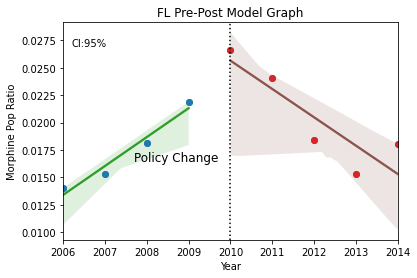

In [7]:
import warnings

warnings.filterwarnings("ignore")

# plot the figure

fig, ax = plt.subplots()
ax.plot(x_pre, y_pre, "o")
m, b = np.polyfit(x_pre, y_pre, 1)
plt.plot(x_pre, m * x_pre + b)
ax = sns.regplot(x_pre, y_pre, ci=95)

ax.plot(x_post, y_post, "o")
m, b = np.polyfit(x_post, y_post, 1)
plt.plot(x_post, m * x_post + b)
ax = sns.regplot(x_post, y_post, ci=95)

plt.xlabel("Year")
plt.ylabel("Morphine Pop Ratio")
plt.title("FL Pre-Post Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.text(2007.7, 0.0165, "Policy Change", fontsize=12)
plt.text(2006.2, 0.027, "CI:95%", fontsize=10)

plt.show()

In [8]:
# import warnings

# warnings.filterwarnings("ignore")

# # regression result for pre policy period -- obtain standard error

# model_pre = sm.OLS(y_pre, x_pre)
# result_pre = model_pre.fit()
# print(result_pre.summary())

In [9]:
# import warnings

# warnings.filterwarnings("ignore")

# # regression result for post policy period -- obtain standard error

# model_post = sm.OLS(y_post, x_post)
# result_post = model_post.fit()
# print(result_post.summary())